In [20]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from math import sqrt
from sklearn.linear_model import LassoCV, LassoLarsCV, Lasso, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from google.colab import drive, files 
drive.mount('/content.drive')

Drive already mounted at /content.drive; to attempt to forcibly remount, call drive.mount("/content.drive", force_remount=True).


In [22]:
train = pd.read_csv('/content.drive/MyDrive/UIUC/MLTP/Classification/DATA/final_train.csv')
test = pd.read_csv('/content.drive/MyDrive/UIUC/MLTP/Classification/DATA/final_test.csv')
dropp = ['Unnamed: 0']
train = train.drop(dropp,axis=1)
test = test.drop(dropp,axis=1)

# Baseline Multiple Logistic Regression (ALL)

In [ ]:
ddp = ['class']
x = train.drop(ddp, axis = 1)
y = train['class']

In [ ]:
# np.arange(100,1100000,100000)

In [ ]:
log = LogisticRegression(max_iter = 900000)
log_pa = {
    'penalty': ['l1',' l2', 'elasticnet'],
    'C': np.logspace(-4, -0.5, 30),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced', None]
    # 'max_iter': np.arange(100,1100000,10000)
}

log_grid = GridSearchCV(log, log_pa, cv = 4, scoring = 'f1_weighted')
log_grid.fit(x, y)
# print('Best cv accuracy: {}' .format(log_grid.best_score_))
# print('Test set score:   {}' .format(log_grid.score(x, y)))
# print('Best parameters:  {}' .format(log_grid.best_params_))

In [ ]:
print('Best cv accuracy: {}' .format(log_grid.best_score_))
print('Test set score:   {}' .format(log_grid.score(x, y)))
print('Best parameters:  {}' .format(log_grid.best_params_))

Best cv accuracy: 0.6095950676307818
Test set score:   0.7667259835942632
Best parameters:  {'C': 0.31622776601683794, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


F1_test 0.6027800242085957
F1_train 0.6802675010158865
Accuracy_test 0.625
Accuracy_train 0.7023809523809524
Precision_test 0.6668831168831169
Precision_train 0.7155238235468249
Recall_test 0.625
Recall_train 0.7023809523809524


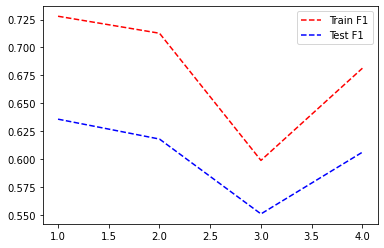

In [ ]:
f1_log_test = []
f1_log_train = []
acc_log_test = []
acc_log_train = []
pre_log_test = []
pre_log_train = []
re_log_test = []
re_log_train = []

kf = StratifiedKFold(n_splits=4, random_state=0, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[x.index.isin(train_index)], x[x.index.isin(test_index)]
    y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]

    log = LogisticRegression(max_iter = 1000000, C = 0.3, penalty = 'l1', solver = 'liblinear',
                             class_weight = 'balanced')

    log.fit(x_train, y_train)
    predicted = log.predict(x_test)

    pred_train = log.predict(x_train)
    
    f1_test = metrics.f1_score(y_test, predicted, average = 'weighted')
    f1_train = metrics.f1_score(y_train, pred_train, average = 'weighted')

    acc_test = metrics.accuracy_score(y_test, predicted)
    acc_train = metrics.accuracy_score(y_train, pred_train)

    pre_test = metrics.precision_score(y_test, predicted, average = 'weighted')
    pre_train = metrics.precision_score(y_train, pred_train, average = 'weighted')

    re_test = metrics.recall_score(y_test, predicted, average = 'weighted')
    re_train = metrics.recall_score(y_train, pred_train, average = 'weighted')

    f1_log_test.append(f1_test)
    f1_log_train.append(f1_train)

    acc_log_test.append(acc_test)   
    acc_log_train.append(acc_train) 

    pre_log_test.append(pre_test)   
    pre_log_train.append(pre_train)

    re_log_test.append(re_test)   
    re_log_train.append(re_train)

print('F1_test',np.mean(f1_log_test))
print('F1_train', np.mean(f1_log_train))
print('Accuracy_test',np.mean(acc_log_test))
print('Accuracy_train', np.mean(acc_log_train))
print('Precision_test',np.mean(pre_log_test))
print('Precision_train', np.mean(pre_log_train))
print('Recall_test',np.mean(re_log_test))
print('Recall_train', np.mean(re_log_train))

log = {
    'Fold': pd.Series([1,2,3,4]),
    'Train_F1': pd.Series(f1_log_train),
    'Test_F1': pd.Series(f1_log_test)
}
log_fitting = pd.DataFrame(log)

plt.plot(log_fitting['Fold'], log_fitting['Train_F1'], 'r--', log_fitting['Fold'], log_fitting['Test_F1'], 'b--')
# plt.ylim((0.40,0.50))
plt.legend(['Train F1', 'Test F1'])
plt.show()

# Ridge Multi

In [ ]:
x = train[['Area', 'Area_100', 'Area_40', 'Area_60', 'Area_80', 'Assym',
       'Assym_100', 'Assym_40', 'Assym_80', 'BordLngth', 'BordLngth_100',
       'BordLngth_120', 'BordLngth_140', 'BordLngth_40', 'BordLngth_60',
       'BordLngth_80', 'BrdIndx', 'BrdIndx_120', 'BrdIndx_140',
       'BrdIndx_40', 'BrdIndx_60', 'Bright_40', 'Bright_80', 'Compact_40',
       'Compact_60', 'Compact_80', 'Dens', 'Dens_100', 'Dens_120',
       'Dens_140', 'Dens_40', 'Dens_80', 'GLCM1_100', 'GLCM1_40',
       'GLCM1_80', 'GLCM2', 'GLCM2_100', 'GLCM3', 'GLCM3_100', 'GLCM3_40',
       'GLCM3_80', 'LW', 'LW_120', 'LW_140', 'LW_60', 'LW_80', 'Mean_G',
       'Mean_G_100', 'Mean_G_120', 'Mean_G_140', 'Mean_G_40', 'Mean_G_60',
       'Mean_G_80', 'Mean_NIR', 'Mean_NIR_100', 'Mean_NIR_120',
       'Mean_NIR_140', 'Mean_NIR_60', 'Mean_NIR_80', 'Mean_R_40',
       'Mean_R_80', 'NDVI', 'NDVI_120', 'NDVI_140', 'NDVI_40', 'NDVI_60',
       'Rect', 'Rect_100', 'Rect_40', 'Rect_60', 'Rect_80', 'Round',
       'Round_60', 'Round_80', 'SD_G', 'SD_G_100', 'SD_NIR', 'SD_NIR_100',
       'SD_NIR_120', 'SD_NIR_140', 'SD_NIR_60', 'SD_R', 'SD_R_40',
       'SD_R_60', 'ShpIndx', 'ShpIndx_100', 'ShpIndx_120', 'ShpIndx_140',
       'ShpIndx_40', 'ShpIndx_60', 'ShpIndx_80']]
y = train['class']

In [ ]:
log = LogisticRegression()
log_pa = {
    'penalty': ['l1',' l2', 'elasticnet'],
    'C': np.arange(0.01,31),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced', None],
    'l1_ratio': [0.001,0.01,0.1]
    # 'max_iter': np.arange(100,1100000,10000)
}

log_grid = GridSearchCV(log, log_pa, cv = 4, scoring = 'f1_weighted')
log_grid.fit(x, y)

In [ ]:
print('Best cv accuracy: {}' .format(log_grid.best_score_))
print('Test set score:   {}' .format(log_grid.score(x, y)))
print('Best parameters:  {}' .format(log_grid.best_params_))

Best cv accuracy: 0.8227262719384568
Test set score:   0.909965458923792
Best parameters:  {'C': 3.01, 'class_weight': None, 'l1_ratio': 0.001, 'penalty': 'l1', 'solver': 'saga'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr

F1_test 0.7882543926661574
F1_train 0.9295553318190274
Accuracy_test 0.7916666666666666
Accuracy_train 0.9305555555555556
Precision_test 0.8182584776334776
Precision_train 0.9351373462064251
Recall_test 0.7916666666666666
Recall_train 0.9305555555555556


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



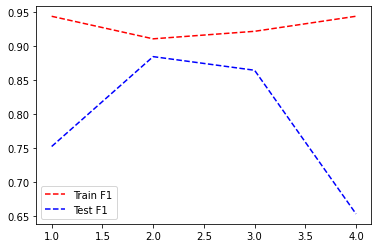

In [ ]:
f1_log_test = []
f1_log_train = []
acc_log_test = []
acc_log_train = []
pre_log_test = []
pre_log_train = []
re_log_test = []
re_log_train = []

kf = StratifiedKFold(n_splits=4, random_state=0, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[x.index.isin(train_index)], x[x.index.isin(test_index)]
    y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]

    log = LogisticRegression(C = 3, penalty = 'l1', solver = 'saga', class_weight = None, l1_ratio = 0.001)

    log.fit(x_train, y_train)
    predicted = log.predict(x_test)

    pred_train = log.predict(x_train)
    
    f1_test = metrics.f1_score(y_test, predicted, average = 'weighted')
    f1_train = metrics.f1_score(y_train, pred_train, average = 'weighted')

    acc_test = metrics.accuracy_score(y_test, predicted)
    acc_train = metrics.accuracy_score(y_train, pred_train)

    pre_test = metrics.precision_score(y_test, predicted, average = 'weighted')
    pre_train = metrics.precision_score(y_train, pred_train, average = 'weighted')

    re_test = metrics.recall_score(y_test, predicted, average = 'weighted')
    re_train = metrics.recall_score(y_train, pred_train, average = 'weighted')

    f1_log_test.append(f1_test)
    f1_log_train.append(f1_train)

    acc_log_test.append(acc_test)   
    acc_log_train.append(acc_train) 

    pre_log_test.append(pre_test)   
    pre_log_train.append(pre_train)

    re_log_test.append(re_test)   
    re_log_train.append(re_train)

print('F1_test',np.mean(f1_log_test))
print('F1_train', np.mean(f1_log_train))
print('Accuracy_test',np.mean(acc_log_test))
print('Accuracy_train', np.mean(acc_log_train))
print('Precision_test',np.mean(pre_log_test))
print('Precision_train', np.mean(pre_log_train))
print('Recall_test',np.mean(re_log_test))
print('Recall_train', np.mean(re_log_train))

log = {
    'Fold': pd.Series([1,2,3,4]),
    'Train_F1': pd.Series(f1_log_train),
    'Test_F1': pd.Series(f1_log_test)
}
log_fitting = pd.DataFrame(log)

plt.plot(log_fitting['Fold'], log_fitting['Train_F1'], 'r--', log_fitting['Fold'], log_fitting['Test_F1'], 'b--')
# plt.ylim((0.40,0.50))
plt.legend(['Train F1', 'Test F1'])
plt.show()

In [ ]:
x_train = train[['Area', 'Area_100', 'Area_40', 'Area_60', 'Area_80', 'Assym',
       'Assym_100', 'Assym_40', 'Assym_80', 'BordLngth', 'BordLngth_100',
       'BordLngth_120', 'BordLngth_140', 'BordLngth_40', 'BordLngth_60',
       'BordLngth_80', 'BrdIndx', 'BrdIndx_120', 'BrdIndx_140',
       'BrdIndx_40', 'BrdIndx_60', 'Bright_40', 'Bright_80', 'Compact_40',
       'Compact_60', 'Compact_80', 'Dens', 'Dens_100', 'Dens_120',
       'Dens_140', 'Dens_40', 'Dens_80', 'GLCM1_100', 'GLCM1_40',
       'GLCM1_80', 'GLCM2', 'GLCM2_100', 'GLCM3', 'GLCM3_100', 'GLCM3_40',
       'GLCM3_80', 'LW', 'LW_120', 'LW_140', 'LW_60', 'LW_80', 'Mean_G',
       'Mean_G_100', 'Mean_G_120', 'Mean_G_140', 'Mean_G_40', 'Mean_G_60',
       'Mean_G_80', 'Mean_NIR', 'Mean_NIR_100', 'Mean_NIR_120',
       'Mean_NIR_140', 'Mean_NIR_60', 'Mean_NIR_80', 'Mean_R_40',
       'Mean_R_80', 'NDVI', 'NDVI_120', 'NDVI_140', 'NDVI_40', 'NDVI_60',
       'Rect', 'Rect_100', 'Rect_40', 'Rect_60', 'Rect_80', 'Round',
       'Round_60', 'Round_80', 'SD_G', 'SD_G_100', 'SD_NIR', 'SD_NIR_100',
       'SD_NIR_120', 'SD_NIR_140', 'SD_NIR_60', 'SD_R', 'SD_R_40',
       'SD_R_60', 'ShpIndx', 'ShpIndx_100', 'ShpIndx_120', 'ShpIndx_140',
       'ShpIndx_40', 'ShpIndx_60', 'ShpIndx_80']]
x_test = test[['Area', 'Area_100', 'Area_40', 'Area_60', 'Area_80', 'Assym',
       'Assym_100', 'Assym_40', 'Assym_80', 'BordLngth', 'BordLngth_100',
       'BordLngth_120', 'BordLngth_140', 'BordLngth_40', 'BordLngth_60',
       'BordLngth_80', 'BrdIndx', 'BrdIndx_120', 'BrdIndx_140',
       'BrdIndx_40', 'BrdIndx_60', 'Bright_40', 'Bright_80', 'Compact_40',
       'Compact_60', 'Compact_80', 'Dens', 'Dens_100', 'Dens_120',
       'Dens_140', 'Dens_40', 'Dens_80', 'GLCM1_100', 'GLCM1_40',
       'GLCM1_80', 'GLCM2', 'GLCM2_100', 'GLCM3', 'GLCM3_100', 'GLCM3_40',
       'GLCM3_80', 'LW', 'LW_120', 'LW_140', 'LW_60', 'LW_80', 'Mean_G',
       'Mean_G_100', 'Mean_G_120', 'Mean_G_140', 'Mean_G_40', 'Mean_G_60',
       'Mean_G_80', 'Mean_NIR', 'Mean_NIR_100', 'Mean_NIR_120',
       'Mean_NIR_140', 'Mean_NIR_60', 'Mean_NIR_80', 'Mean_R_40',
       'Mean_R_80', 'NDVI', 'NDVI_120', 'NDVI_140', 'NDVI_40', 'NDVI_60',
       'Rect', 'Rect_100', 'Rect_40', 'Rect_60', 'Rect_80', 'Round',
       'Round_60', 'Round_80', 'SD_G', 'SD_G_100', 'SD_NIR', 'SD_NIR_100',
       'SD_NIR_120', 'SD_NIR_140', 'SD_NIR_60', 'SD_R', 'SD_R_40',
       'SD_R_60', 'ShpIndx', 'ShpIndx_100', 'ShpIndx_120', 'ShpIndx_140',
       'ShpIndx_40', 'ShpIndx_60', 'ShpIndx_80']]
y_train = train['class']
y_test = test['class']

In [ ]:
log = LogisticRegression(C = 3, penalty = 'l1', solver = 'saga', class_weight = None, l1_ratio = 0.001)
log.fit(x_train, y_train)
log_pred = log.predict(x_test)

print(metrics.classification_report(y_test, log_pred, digits = 4))

              precision    recall  f1-score   support

    asphalt      0.9697    0.7111    0.8205        45
   building      0.9265    0.6495    0.7636        97
        car      0.6250    0.9524    0.7547        21
   concrete      0.7849    0.7849    0.7849        93
      grass      0.7176    0.7349    0.7262        83
       pool      0.9231    0.8571    0.8889        14
     shadow      0.7241    0.9333    0.8155        45
       soil      0.2889    0.6500    0.4000        20
       tree      0.8250    0.7416    0.7811        89

    accuracy                         0.7535       507
   macro avg     0.7539    0.7794    0.7484       507
weighted avg     0.7967    0.7535    0.7629       507



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



# Ridge 2

In [23]:
x = train[['Area', 'Area_100', 'Area_120', 'Area_140', 'Area_40', 'Area_60',
       'Area_80', 'Assym', 'Assym_100', 'Assym_40', 'Assym_60',
       'Assym_80', 'BordLngth', 'BordLngth_100', 'BordLngth_120',
       'BordLngth_140', 'BordLngth_40', 'BordLngth_60', 'BordLngth_80',
       'BrdIndx', 'BrdIndx_100', 'BrdIndx_120', 'BrdIndx_140',
       'BrdIndx_40', 'BrdIndx_60', 'BrdIndx_80', 'Bright', 'Bright_100',
       'Bright_120', 'Bright_140', 'Bright_40', 'Bright_60', 'Bright_80',
       'Compact', 'Compact_100', 'Compact_40', 'Compact_60', 'Compact_80',
       'Dens', 'Dens_100', 'Dens_120', 'Dens_140', 'Dens_40', 'Dens_80',
       'GLCM1_100', 'GLCM1_120', 'GLCM1_140', 'GLCM1_40', 'GLCM1_60',
       'GLCM1_80', 'GLCM2', 'GLCM2_100', 'GLCM2_120', 'GLCM2_140',
       'GLCM2_40', 'GLCM2_60', 'GLCM2_80', 'GLCM3', 'GLCM3_100',
       'GLCM3_120', 'GLCM3_140', 'GLCM3_40', 'GLCM3_60', 'GLCM3_80', 'LW',
       'LW_100', 'LW_120', 'LW_140', 'LW_40', 'LW_60', 'LW_80', 'Mean_G',
       'Mean_G_100', 'Mean_G_120', 'Mean_G_140', 'Mean_G_40', 'Mean_G_60',
       'Mean_G_80', 'Mean_NIR', 'Mean_NIR_100', 'Mean_NIR_120',
       'Mean_NIR_140', 'Mean_NIR_40', 'Mean_NIR_60', 'Mean_NIR_80',
       'Mean_R', 'Mean_R_100', 'Mean_R_120', 'Mean_R_140', 'Mean_R_40',
       'Mean_R_60', 'Mean_R_80', 'NDVI', 'NDVI_100', 'NDVI_120',
       'NDVI_140', 'NDVI_40', 'NDVI_60', 'NDVI_80', 'Rect', 'Rect_100',
       'Rect_120', 'Rect_140', 'Rect_40', 'Rect_60', 'Rect_80', 'Round',
       'Round_120', 'Round_140', 'Round_60', 'Round_80', 'SD_G',
       'SD_G_100', 'SD_G_120', 'SD_G_140', 'SD_G_40', 'SD_G_60', 'SD_NIR',
       'SD_NIR_100', 'SD_NIR_120', 'SD_NIR_140', 'SD_NIR_40', 'SD_NIR_60',
       'SD_R', 'SD_R_100', 'SD_R_40', 'SD_R_60', 'SD_R_80', 'ShpIndx',
       'ShpIndx_100', 'ShpIndx_120', 'ShpIndx_140', 'ShpIndx_40',
       'ShpIndx_60', 'ShpIndx_80']]
y = train['class']

In [24]:
log = LogisticRegression()
log_pa = {
    'penalty': ['l1',' l2', 'elasticnet'],
    'C': np.arange(0.01,31),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced', None],
    'l1_ratio': [0.001,0.01,0.1]
    # 'max_iter': np.arange(100,1100000,10000)
}

log_grid = GridSearchCV(log, log_pa, cv = 4, scoring = 'f1_weighted')
log_grid.fit(x, y)

Streaming output truncated to the last 5000 lines.
l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.000e-02, 1.010e+0...
       1.801e+01, 1.901e+01, 2.001e+01, 2.101e+01, 2.201e+01, 2.301e+01,
       2.401e+01, 2.501e+01, 2.601e+01, 2.701e+01, 2.801e+01, 2.901e+01,
       3.001e+01]),
                         'class_weight': ['balanced', None],
                         'l1_ratio': [0.001, 0.01, 0.1],
        

In [25]:
print('Best cv accuracy: {}' .format(log_grid.best_score_))
print('Test set score:   {}' .format(log_grid.score(x, y)))
print('Best parameters:  {}' .format(log_grid.best_params_))

Best cv accuracy: 0.8371062799634228
Test set score:   0.9521925100006333
Best parameters:  {'C': 3.01, 'class_weight': 'balanced', 'l1_ratio': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)



F1_test 0.7821371157243006
F1_train 0.9522654878222128
Accuracy_test 0.7857142857142858
Accuracy_train 0.9523809523809524
Precision_test 0.819011544011544
Precision_train 0.9546735858648452
Recall_test 0.7857142857142858
Recall_train 0.9523809523809524


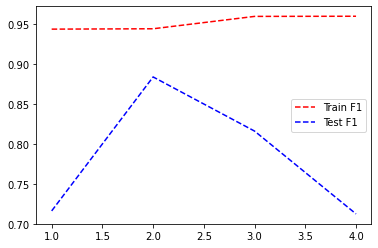

In [27]:
f1_log_test = []
f1_log_train = []
acc_log_test = []
acc_log_train = []
pre_log_test = []
pre_log_train = []
re_log_test = []
re_log_train = []

kf = StratifiedKFold(n_splits=4, random_state=0, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[x.index.isin(train_index)], x[x.index.isin(test_index)]
    y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]

    log = LogisticRegression(C = 3, penalty = 'l1', solver = 'liblinear', 
                             class_weight = "balanced", l1_ratio = 0.1)

    log.fit(x_train, y_train)
    predicted = log.predict(x_test)

    pred_train = log.predict(x_train)
    
    f1_test = metrics.f1_score(y_test, predicted, average = 'weighted')
    f1_train = metrics.f1_score(y_train, pred_train, average = 'weighted')

    acc_test = metrics.accuracy_score(y_test, predicted)
    acc_train = metrics.accuracy_score(y_train, pred_train)

    pre_test = metrics.precision_score(y_test, predicted, average = 'weighted')
    pre_train = metrics.precision_score(y_train, pred_train, average = 'weighted')

    re_test = metrics.recall_score(y_test, predicted, average = 'weighted')
    re_train = metrics.recall_score(y_train, pred_train, average = 'weighted')

    f1_log_test.append(f1_test)
    f1_log_train.append(f1_train)

    acc_log_test.append(acc_test)   
    acc_log_train.append(acc_train) 

    pre_log_test.append(pre_test)   
    pre_log_train.append(pre_train)

    re_log_test.append(re_test)   
    re_log_train.append(re_train)

print('F1_test',np.mean(f1_log_test))
print('F1_train', np.mean(f1_log_train))
print('Accuracy_test',np.mean(acc_log_test))
print('Accuracy_train', np.mean(acc_log_train))
print('Precision_test',np.mean(pre_log_test))
print('Precision_train', np.mean(pre_log_train))
print('Recall_test',np.mean(re_log_test))
print('Recall_train', np.mean(re_log_train))

log = {
    'Fold': pd.Series([1,2,3,4]),
    'Train_F1': pd.Series(f1_log_train),
    'Test_F1': pd.Series(f1_log_test)
}
log_fitting = pd.DataFrame(log)

plt.plot(log_fitting['Fold'], log_fitting['Train_F1'], 'r--', log_fitting['Fold'], log_fitting['Test_F1'], 'b--')
# plt.ylim((0.40,0.50))
plt.legend(['Train F1', 'Test F1'])
plt.show()

In [28]:
x_train = train[['Area', 'Area_100', 'Area_120', 'Area_140', 'Area_40', 'Area_60',
       'Area_80', 'Assym', 'Assym_100', 'Assym_40', 'Assym_60',
       'Assym_80', 'BordLngth', 'BordLngth_100', 'BordLngth_120',
       'BordLngth_140', 'BordLngth_40', 'BordLngth_60', 'BordLngth_80',
       'BrdIndx', 'BrdIndx_100', 'BrdIndx_120', 'BrdIndx_140',
       'BrdIndx_40', 'BrdIndx_60', 'BrdIndx_80', 'Bright', 'Bright_100',
       'Bright_120', 'Bright_140', 'Bright_40', 'Bright_60', 'Bright_80',
       'Compact', 'Compact_100', 'Compact_40', 'Compact_60', 'Compact_80',
       'Dens', 'Dens_100', 'Dens_120', 'Dens_140', 'Dens_40', 'Dens_80',
       'GLCM1_100', 'GLCM1_120', 'GLCM1_140', 'GLCM1_40', 'GLCM1_60',
       'GLCM1_80', 'GLCM2', 'GLCM2_100', 'GLCM2_120', 'GLCM2_140',
       'GLCM2_40', 'GLCM2_60', 'GLCM2_80', 'GLCM3', 'GLCM3_100',
       'GLCM3_120', 'GLCM3_140', 'GLCM3_40', 'GLCM3_60', 'GLCM3_80', 'LW',
       'LW_100', 'LW_120', 'LW_140', 'LW_40', 'LW_60', 'LW_80', 'Mean_G',
       'Mean_G_100', 'Mean_G_120', 'Mean_G_140', 'Mean_G_40', 'Mean_G_60',
       'Mean_G_80', 'Mean_NIR', 'Mean_NIR_100', 'Mean_NIR_120',
       'Mean_NIR_140', 'Mean_NIR_40', 'Mean_NIR_60', 'Mean_NIR_80',
       'Mean_R', 'Mean_R_100', 'Mean_R_120', 'Mean_R_140', 'Mean_R_40',
       'Mean_R_60', 'Mean_R_80', 'NDVI', 'NDVI_100', 'NDVI_120',
       'NDVI_140', 'NDVI_40', 'NDVI_60', 'NDVI_80', 'Rect', 'Rect_100',
       'Rect_120', 'Rect_140', 'Rect_40', 'Rect_60', 'Rect_80', 'Round',
       'Round_120', 'Round_140', 'Round_60', 'Round_80', 'SD_G',
       'SD_G_100', 'SD_G_120', 'SD_G_140', 'SD_G_40', 'SD_G_60', 'SD_NIR',
       'SD_NIR_100', 'SD_NIR_120', 'SD_NIR_140', 'SD_NIR_40', 'SD_NIR_60',
       'SD_R', 'SD_R_100', 'SD_R_40', 'SD_R_60', 'SD_R_80', 'ShpIndx',
       'ShpIndx_100', 'ShpIndx_120', 'ShpIndx_140', 'ShpIndx_40',
       'ShpIndx_60', 'ShpIndx_80']]
x_test = test[['Area', 'Area_100', 'Area_120', 'Area_140', 'Area_40', 'Area_60',
       'Area_80', 'Assym', 'Assym_100', 'Assym_40', 'Assym_60',
       'Assym_80', 'BordLngth', 'BordLngth_100', 'BordLngth_120',
       'BordLngth_140', 'BordLngth_40', 'BordLngth_60', 'BordLngth_80',
       'BrdIndx', 'BrdIndx_100', 'BrdIndx_120', 'BrdIndx_140',
       'BrdIndx_40', 'BrdIndx_60', 'BrdIndx_80', 'Bright', 'Bright_100',
       'Bright_120', 'Bright_140', 'Bright_40', 'Bright_60', 'Bright_80',
       'Compact', 'Compact_100', 'Compact_40', 'Compact_60', 'Compact_80',
       'Dens', 'Dens_100', 'Dens_120', 'Dens_140', 'Dens_40', 'Dens_80',
       'GLCM1_100', 'GLCM1_120', 'GLCM1_140', 'GLCM1_40', 'GLCM1_60',
       'GLCM1_80', 'GLCM2', 'GLCM2_100', 'GLCM2_120', 'GLCM2_140',
       'GLCM2_40', 'GLCM2_60', 'GLCM2_80', 'GLCM3', 'GLCM3_100',
       'GLCM3_120', 'GLCM3_140', 'GLCM3_40', 'GLCM3_60', 'GLCM3_80', 'LW',
       'LW_100', 'LW_120', 'LW_140', 'LW_40', 'LW_60', 'LW_80', 'Mean_G',
       'Mean_G_100', 'Mean_G_120', 'Mean_G_140', 'Mean_G_40', 'Mean_G_60',
       'Mean_G_80', 'Mean_NIR', 'Mean_NIR_100', 'Mean_NIR_120',
       'Mean_NIR_140', 'Mean_NIR_40', 'Mean_NIR_60', 'Mean_NIR_80',
       'Mean_R', 'Mean_R_100', 'Mean_R_120', 'Mean_R_140', 'Mean_R_40',
       'Mean_R_60', 'Mean_R_80', 'NDVI', 'NDVI_100', 'NDVI_120',
       'NDVI_140', 'NDVI_40', 'NDVI_60', 'NDVI_80', 'Rect', 'Rect_100',
       'Rect_120', 'Rect_140', 'Rect_40', 'Rect_60', 'Rect_80', 'Round',
       'Round_120', 'Round_140', 'Round_60', 'Round_80', 'SD_G',
       'SD_G_100', 'SD_G_120', 'SD_G_140', 'SD_G_40', 'SD_G_60', 'SD_NIR',
       'SD_NIR_100', 'SD_NIR_120', 'SD_NIR_140', 'SD_NIR_40', 'SD_NIR_60',
       'SD_R', 'SD_R_100', 'SD_R_40', 'SD_R_60', 'SD_R_80', 'ShpIndx',
       'ShpIndx_100', 'ShpIndx_120', 'ShpIndx_140', 'ShpIndx_40',
       'ShpIndx_60', 'ShpIndx_80']]
y_train = train['class']
y_test = test['class']

In [29]:
log = LogisticRegression(C = 3, penalty = 'l1', solver = 'liblinear', 
                             class_weight = "balanced", l1_ratio = 0.1)
log.fit(x_train, y_train)
log_pred = log.predict(x_test)

print(metrics.classification_report(y_test, log_pred, digits = 4))

              precision    recall  f1-score   support

    asphalt      0.9118    0.6889    0.7848        45
   building      0.8519    0.7113    0.7753        97
        car      0.6786    0.9048    0.7755        21
   concrete      0.7705    0.5054    0.6104        93
      grass      0.8000    0.5783    0.6713        83
       pool      1.0000    0.8571    0.9231        14
     shadow      0.7241    0.9333    0.8155        45
       soil      0.2055    0.7500    0.3226        20
       tree      0.7200    0.8090    0.7619        89

    accuracy                         0.7002       507
   macro avg     0.7403    0.7487    0.7156       507
weighted avg     0.7707    0.7002    0.7163       507



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)



# Lasso Multi

In [ ]:
x = train[['Area', 'Assym', 'Assym_100', 'Assym_40', 'BordLngth_40',
       'Compact', 'GLCM1', 'GLCM1_60', 'Mean_NIR_80', 'NDVI_120',
       'NDVI_40', 'Rect', 'SD_G_120', 'SD_G_140']]
y= train['class']

In [ ]:
log = LogisticRegression()
log_pa = {
    'penalty': ['l1',' l2', 'elasticnet'],
    'C': np.arange(0.01,31),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced', None],
    'l1_ratio': [0.001,0.01,0.1]
    # 'max_iter': np.arange(100,1100000,10000)
}

log_grid = GridSearchCV(log, log_pa, cv = 4, scoring = 'f1_weighted')
log_grid.fit(x, y)

In [ ]:
print('Best cv accuracy: {}' .format(log_grid.best_score_))
print('Test set score:   {}' .format(log_grid.score(x, y)))
print('Best parameters:  {}' .format(log_grid.best_params_))

F1_test 0.7665697786496106
F1_train 0.919920693478074
Accuracy_test 0.7678571428571428
Accuracy_train 0.9206349206349207
Precision_test 0.7969246031746031
Precision_train 0.9256153927646371
Recall_test 0.7678571428571428
Recall_train 0.9206349206349207


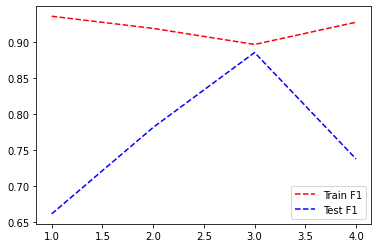

In [ ]:
f1_log_test = []
f1_log_train = []
acc_log_test = []
acc_log_train = []
pre_log_test = []
pre_log_train = []
re_log_test = []
re_log_train = []

kf = StratifiedKFold(n_splits=4, random_state=0, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[x.index.isin(train_index)], x[x.index.isin(test_index)]
    y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]

    log = LogisticRegression(C = 29, class_weight = None, penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.1,
                             max_iter = 900000)

    log.fit(x_train, y_train)
    predicted = log.predict(x_test)

    pred_train = log.predict(x_train)
    
    f1_test = metrics.f1_score(y_test, predicted, average = 'weighted')
    f1_train = metrics.f1_score(y_train, pred_train, average = 'weighted')

    acc_test = metrics.accuracy_score(y_test, predicted)
    acc_train = metrics.accuracy_score(y_train, pred_train)

    pre_test = metrics.precision_score(y_test, predicted, average = 'weighted')
    pre_train = metrics.precision_score(y_train, pred_train, average = 'weighted')

    re_test = metrics.recall_score(y_test, predicted, average = 'weighted')
    re_train = metrics.recall_score(y_train, pred_train, average = 'weighted')

    f1_log_test.append(f1_test)
    f1_log_train.append(f1_train)

    acc_log_test.append(acc_test)   
    acc_log_train.append(acc_train) 

    pre_log_test.append(pre_test)   
    pre_log_train.append(pre_train)

    re_log_test.append(re_test)   
    re_log_train.append(re_train)

print('F1_test',np.mean(f1_log_test))
print('F1_train', np.mean(f1_log_train))
print('Accuracy_test',np.mean(acc_log_test))
print('Accuracy_train', np.mean(acc_log_train))
print('Precision_test',np.mean(pre_log_test))
print('Precision_train', np.mean(pre_log_train))
print('Recall_test',np.mean(re_log_test))
print('Recall_train', np.mean(re_log_train))

log = {
    'Fold': pd.Series([1,2,3,4]),
    'Train_F1': pd.Series(f1_log_train),
    'Test_F1': pd.Series(f1_log_test)
}
log_fitting = pd.DataFrame(log)

plt.plot(log_fitting['Fold'], log_fitting['Train_F1'], 'r--', log_fitting['Fold'], log_fitting['Test_F1'], 'b--')
plt.legend(['Train F1', 'Test F1'])
# plt.ylim((0.40,0.50))
plt.show()

In [ ]:
x_train = train[['Area', 'Assym', 'Assym_100', 'Assym_40', 'BordLngth_40',
       'Compact', 'GLCM1', 'GLCM1_60', 'Mean_NIR_80', 'NDVI_120',
       'NDVI_40', 'Rect', 'SD_G_120', 'SD_G_140']]
x_test = test[['Area', 'Assym', 'Assym_100', 'Assym_40', 'BordLngth_40',
       'Compact', 'GLCM1', 'GLCM1_60', 'Mean_NIR_80', 'NDVI_120',
       'NDVI_40', 'Rect', 'SD_G_120', 'SD_G_140']]
y_train = train['class']
y_test = test['class']

In [ ]:
log = LogisticRegression(C = 29, class_weight = None, penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.1, max_iter=900000)
log.fit(x_train, y_train)
log_pred = log.predict(x_test)

print(metrics.classification_report(y_test, log_pred, digits = 4))

              precision    recall  f1-score   support

    asphalt      0.8846    0.5111    0.6479        45
   building      0.5789    0.6804    0.6256        97
        car      0.5263    0.9524    0.6780        21
   concrete      0.7656    0.5269    0.6242        93
      grass      0.7419    0.5542    0.6345        83
       pool      0.4762    0.7143    0.5714        14
     shadow      0.6364    0.7778    0.7000        45
       soil      0.4000    0.4000    0.4000        20
       tree      0.6729    0.8090    0.7347        89

    accuracy                         0.6489       507
   macro avg     0.6314    0.6585    0.6240       507
weighted avg     0.6765    0.6489    0.6463       507



# Elastic Net Multi

In [ ]:
x = train[['Area', 'Assym', 'Assym_100', 'Assym_40', 'BordLngth',
       'BordLngth_40', 'BrdIndx', 'Compact', 'Compact_60', 'GLCM1',
       'GLCM1_100', 'GLCM1_120', 'GLCM1_140', 'GLCM1_40', 'GLCM1_60',
       'GLCM1_80', 'GLCM2_60', 'GLCM3', 'GLCM3_60', 'Mean_NIR_100',
       'Mean_NIR_120', 'Mean_NIR_140', 'Mean_NIR_80', 'Mean_R',
       'Mean_R_40', 'NDVI', 'NDVI_100', 'NDVI_120', 'NDVI_140', 'NDVI_40',
       'NDVI_60', 'NDVI_80', 'Rect', 'Rect_120', 'Rect_140', 'SD_G_120',
       'SD_G_140', 'SD_NIR', 'ShpIndx']]
y= train['class']

In [ ]:
log = LogisticRegression()
log_pa = {
    'penalty': ['l1',' l2', 'elasticnet'],
    'C': np.arange(0.01,31),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'class_weight': ['balanced', None]
    # 'max_iter': np.arange(100,1100000,10000)
}

log_grid = GridSearchCV(log, log_pa, cv = 4, scoring = 'f1_weighted')
log_grid.fit(x, y)

In [ ]:
print('Best cv accuracy: {}' .format(log_grid.best_score_))
print('Test set score:   {}' .format(log_grid.score(x, y)))
print('Best parameters:  {}' .format(log_grid.best_params_))

F1_test 0.7723231143661815
F1_train 0.9336451608155966
Accuracy_test 0.7797619047619049
Accuracy_train 0.9345238095238095
Precision_test 0.8112764550264551
Precision_train 0.9378177128893633
Recall_test 0.7797619047619049
Recall_train 0.9345238095238095


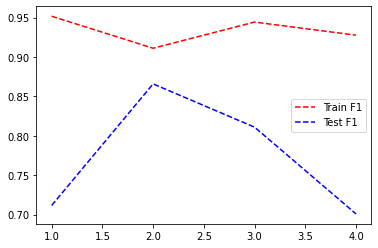

In [ ]:
f1_log_test = []
f1_log_train = []
acc_log_test = []
acc_log_train = []
pre_log_test = []
pre_log_train = []
re_log_test = []
re_log_train = []

kf = StratifiedKFold(n_splits=4, random_state=0, shuffle=True)
for train_index, test_index in kf.split(x,y):
    x_train, x_test = x[x.index.isin(train_index)], x[x.index.isin(test_index)]
    y_train, y_test = y[y.index.isin(train_index)], y[y.index.isin(test_index)]

    log = LogisticRegression(max_iter = 900000, C = 4, class_weight = None, penalty = 'l1', solver = 'saga')

    log.fit(x_train, y_train)
    predicted = log.predict(x_test)

    pred_train = log.predict(x_train)
    
    f1_test = metrics.f1_score(y_test, predicted, average = 'weighted')
    f1_train = metrics.f1_score(y_train, pred_train, average = 'weighted')

    acc_test = metrics.accuracy_score(y_test, predicted)
    acc_train = metrics.accuracy_score(y_train, pred_train)

    pre_test = metrics.precision_score(y_test, predicted, average = 'weighted')
    pre_train = metrics.precision_score(y_train, pred_train, average = 'weighted')

    re_test = metrics.recall_score(y_test, predicted, average = 'weighted')
    re_train = metrics.recall_score(y_train, pred_train, average = 'weighted')

    f1_log_test.append(f1_test)
    f1_log_train.append(f1_train)

    acc_log_test.append(acc_test)   
    acc_log_train.append(acc_train) 

    pre_log_test.append(pre_test)   
    pre_log_train.append(pre_train)

    re_log_test.append(re_test)   
    re_log_train.append(re_train)

print('F1_test',np.mean(f1_log_test))
print('F1_train', np.mean(f1_log_train))
print('Accuracy_test',np.mean(acc_log_test))
print('Accuracy_train', np.mean(acc_log_train))
print('Precision_test',np.mean(pre_log_test))
print('Precision_train', np.mean(pre_log_train))
print('Recall_test',np.mean(re_log_test))
print('Recall_train', np.mean(re_log_train))

log = {
    'Fold': pd.Series([1,2,3,4]),
    'Train_F1': pd.Series(f1_log_train),
    'Test_F1': pd.Series(f1_log_test)
}
log_fitting = pd.DataFrame(log)

plt.plot(log_fitting['Fold'], log_fitting['Train_F1'], 'r--', log_fitting['Fold'], log_fitting['Test_F1'], 'b--')
# plt.ylim((0.40,0.50))
plt.legend(['Train F1', 'Test F1'])
plt.show()

In [ ]:
x_train = train[['Area', 'Assym', 'Assym_100', 'Assym_40', 'BordLngth',
       'BordLngth_40', 'BrdIndx', 'Compact', 'Compact_60', 'GLCM1',
       'GLCM1_100', 'GLCM1_120', 'GLCM1_140', 'GLCM1_40', 'GLCM1_60',
       'GLCM1_80', 'GLCM2_60', 'GLCM3', 'GLCM3_60', 'Mean_NIR_100',
       'Mean_NIR_120', 'Mean_NIR_140', 'Mean_NIR_80', 'Mean_R',
       'Mean_R_40', 'NDVI', 'NDVI_100', 'NDVI_120', 'NDVI_140', 'NDVI_40',
       'NDVI_60', 'NDVI_80', 'Rect', 'Rect_120', 'Rect_140', 'SD_G_120',
       'SD_G_140', 'SD_NIR', 'ShpIndx']]
x_test = test[['Area', 'Assym', 'Assym_100', 'Assym_40', 'BordLngth',
       'BordLngth_40', 'BrdIndx', 'Compact', 'Compact_60', 'GLCM1',
       'GLCM1_100', 'GLCM1_120', 'GLCM1_140', 'GLCM1_40', 'GLCM1_60',
       'GLCM1_80', 'GLCM2_60', 'GLCM3', 'GLCM3_60', 'Mean_NIR_100',
       'Mean_NIR_120', 'Mean_NIR_140', 'Mean_NIR_80', 'Mean_R',
       'Mean_R_40', 'NDVI', 'NDVI_100', 'NDVI_120', 'NDVI_140', 'NDVI_40',
       'NDVI_60', 'NDVI_80', 'Rect', 'Rect_120', 'Rect_140', 'SD_G_120',
       'SD_G_140', 'SD_NIR', 'ShpIndx']]
y_train = train['class']
y_test = test['class']

In [ ]:
log = LogisticRegression(C = 4, class_weight = None, penalty = 'l1', solver = 'saga', max_iter=900000)
log.fit(x_train, y_train)
log_pred = log.predict(x_test)

print(metrics.classification_report(y_test, log_pred, digits = 4))

              precision    recall  f1-score   support

    asphalt      0.9697    0.7111    0.8205        45
   building      0.9074    0.5052    0.6490        97
        car      0.4118    1.0000    0.5833        21
   concrete      0.7130    0.8280    0.7662        93
      grass      0.7500    0.6867    0.7170        83
       pool      1.0000    0.8571    0.9231        14
     shadow      0.7458    0.9778    0.8462        45
       soil      0.3448    0.5000    0.4082        20
       tree      0.7765    0.7416    0.7586        89

    accuracy                         0.7258       507
   macro avg     0.7354    0.7564    0.7191       507
weighted avg     0.7740    0.7258    0.7289       507

